
# This notebook provides examples of:
#  Basic Decision Tree Training and Visualization: 
Trains a basic DecisionTreeClassifier and visualizes the trained tree.

Train/Test Split and Evaluation: Demonstrates how to split your data into training and testing sets and evaluate the model's performance using the score method (which calculates accuracy for classification).

Cross-Validation: Shows how to use cross_val_score for more robust evaluation using k-fold cross-validation.Parameter Tuning (max_depth example): Provides a simple example of tuning the max_depth parameter using cross-validation to find the optimal depth that balances model complexity and performance. You can apply this same approach to tune other hyperparameters like min_samples_split, min_samples_leaf, etc.

Feature Importance: Shows how to access the feature_importances_ attribute to understand which features are most influential in the decision-making process.

Cost Complexity Pruning: Demonstrates finding the optimal pruning parameter (ccp_alpha) using cost complexity pruning and cross-validation, which helps avoid overfitting. The example uses the training dataset to find the most appropriate value for alpha and then visualizes the pruned tree and outputs its feature importances. Additionally, it plots the accuracy scores against alpha values for training and test sets.

In [3]:
pip install python-graphviz #This will error 

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn graphviz matplotlib ipykernel #Dependencies 

In [4]:
from sklearn import tree  # Import the tree module for decision tree functionalities.
from sklearn.datasets import load_iris  # Import load_iris to get the iris dataset.

# Example 1: Basic Classification with DecisionTreeClassifier
X = [[0, 0], [1, 1]]  # Sample feature data.
Y = [0, 1]  # Corresponding target labels.

clf = tree.DecisionTreeClassifier()  # Initialize a decision tree classifier.
clf = clf.fit(X, Y)  # Train the classifier with the sample data.

prediction = clf.predict([[2., 2.]])  # Predict the class for a new data point.
print(prediction)  # Print the predicted class, which is [1].

probabilities = clf.predict_proba([[2., 2.]])  # Predict probabilities for each class.
print(probabilities)  # Print the predicted probabilities, which is [[0., 1.]].

# Example 2: Using the Iris Dataset
iris = load_iris()  # Load the iris dataset.
X, y = iris.data, iris.target  # Assign features (X) and target (y).

clf = tree.DecisionTreeClassifier()  # Initialize another decision tree classifier.
clf = clf.fit(X, y)  # Train the classifier with the iris dataset.

[1]
[[0. 1.]]


[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

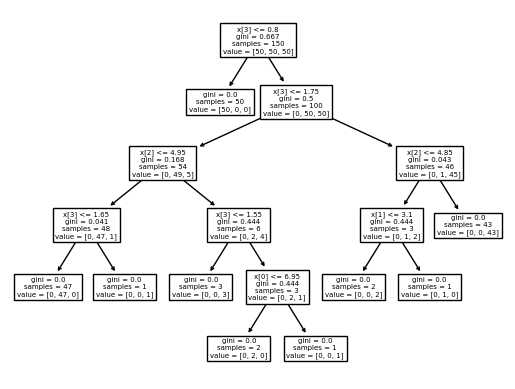

In [5]:
tree.plot_tree(clf) #plot tree

In [ ]:
DecisionTreeClassifier and its methods in more detail, working through examples 
in a Jupyter Notebook.

DecisionTreeClassifier Deep Dive

Here's a breakdown of the DecisionTreeClassifier and some of its key parameters and methods with practical examples:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

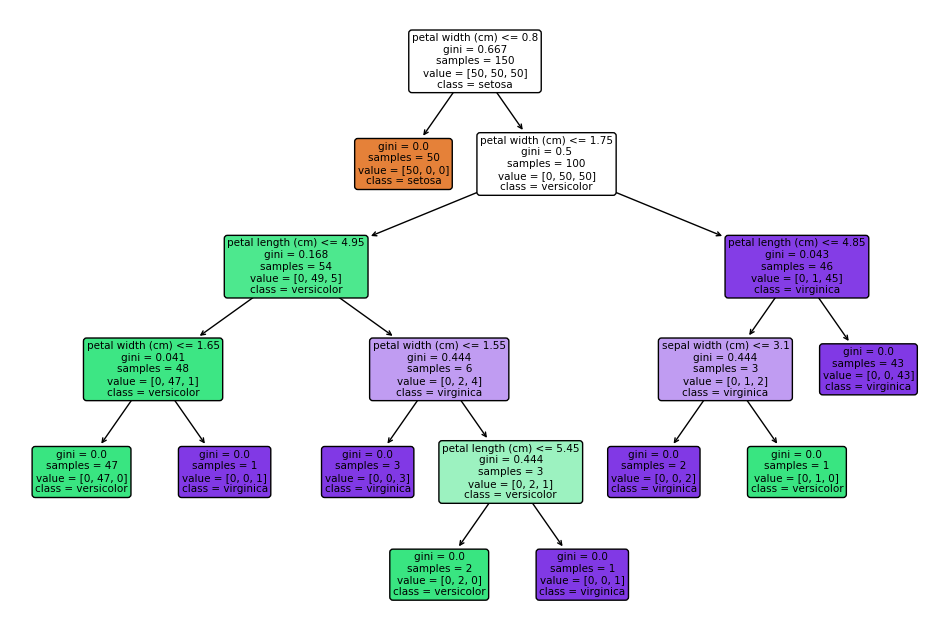

In [6]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# 1. Basic Decision Tree
clf = DecisionTreeClassifier(random_state=0)  # Initialize the classifier
clf.fit(X, y)  # Train on the entire dataset (for demonstration)

# Visualize (using matplotlib – simpler than graphviz if you had issues earlier)
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True, rounded=True)
plt.show()


In [7]:
# 2. Train/Test Split and Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 1.0


In [8]:
# 3. Cross-Validation
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, y, cv=10) # 10-fold cross-validation
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Cross-validation scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
Average cross-validation score: 0.96


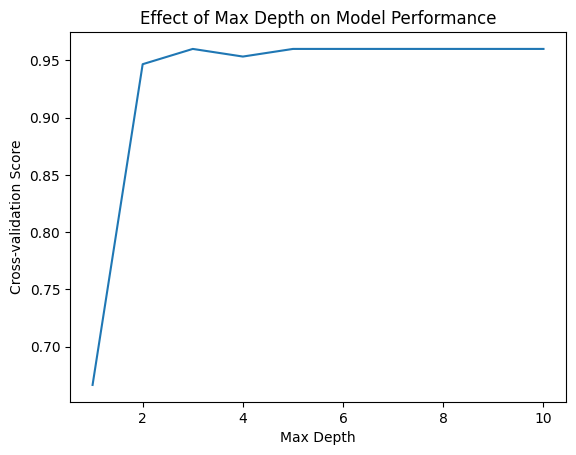

In [9]:
# 4. Parameter Tuning (Example: max_depth)
depths = range(1, 11)  # Explore different tree depths
cv_scores = []
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    scores = cross_val_score(clf, X, y, cv=10)
    cv_scores.append(scores.mean())

plt.plot(depths, cv_scores)
plt.xlabel("Max Depth")
plt.ylabel("Cross-validation Score")
plt.title("Effect of Max Depth on Model Performance")
plt.show()

In [14]:
# 5. Feature Importance
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)
print(f"Feature importances: {clf.feature_importances_}")


Feature importances: [0.         0.01333333 0.06405596 0.92261071]


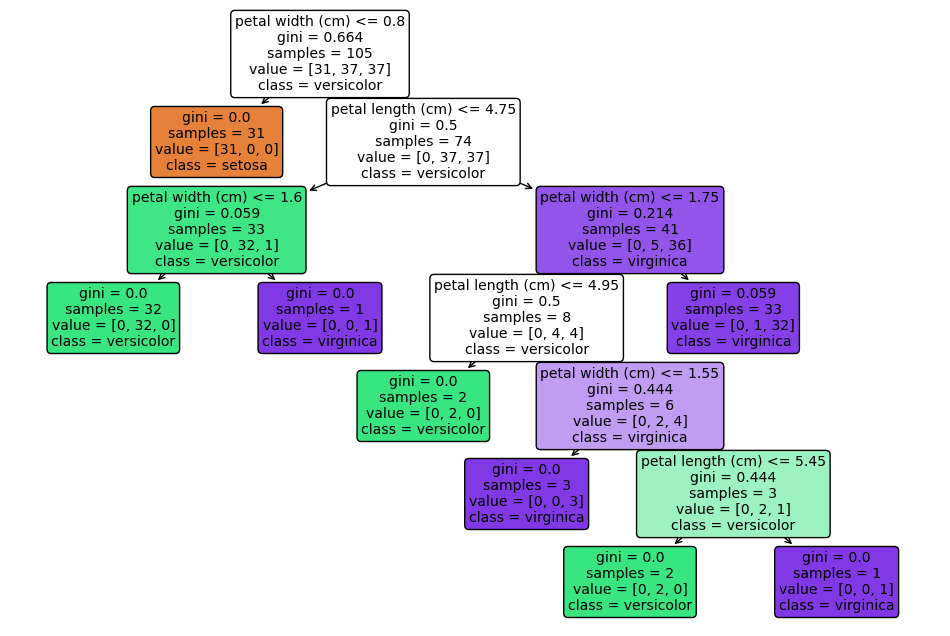

Feature importances pruned clf: [0.        0.        0.4267421 0.5732579]


In [12]:
# 6. Cost Complexity Pruning
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
# Find the best alpha (pruning parameter) using cross-validation on the training set.

# Example using the best alpha (you would determine this through cross-validation)
best_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012) # Example value
best_clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(best_clf, feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True, rounded=True)
plt.show()

print(f"Feature importances pruned clf: {best_clf.feature_importances_}")

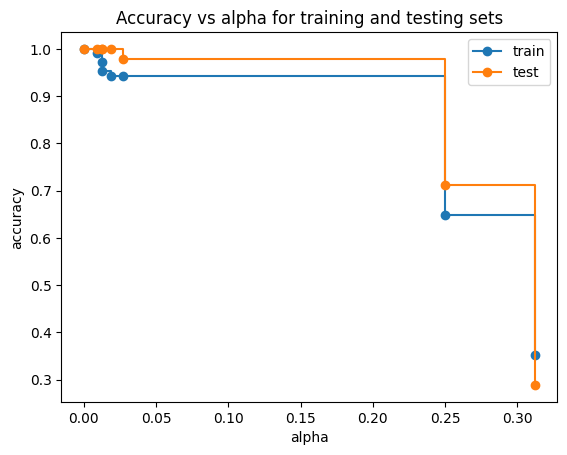

In [15]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# SVM and Classification implement the “one-versus-one” approach for multi-class classification. 
results of the “one-versus-one” classifiers to a “one-vs-rest” decision function of shape (n_samples, n_classes),which is the default setting of the parameter (default=’ovr’).

The main goal of the code is to compare how different SVM classifiers (OvO, OvR, and LinearSVC) partition a 2D space in order to classify the data points into three categories. The decision boundaries show where the classifier switches from one class to another based on its decision rule, helping to understand how each classifier interprets the data. The visualizations also provide insights into how the complexity of the classifier (linear vs. non-linear) affects its ability to separate the classes.

In [20]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [21]:
# 1. One-versus-One (OvO) with SVC
X = [[0], [1], [2], [3]] #Define the Features X
Y = [0, 1, 2, 3] #Define the labels Y

clf_ovo = svm.SVC(decision_function_shape='ovo')  # Explicitly set OvO
clf_ovo.fit(X, Y) #Train the Classifier 

dec_ovo = clf_ovo.decision_function([[1]]) # Compute the decision function values for a sample.
print(f"OvO Decision function shape: {dec_ovo.shape[1]} (4 * (4 - 1) / 2 = 6)")  # 6 decision values

OvO Decision function shape: 6 (4 * (4 - 1) / 2 = 6)


In [22]:
# Converting OvO to One-vs-Rest (OvR)
clf_ovo.decision_function_shape = "ovr"  # Default behavior
dec_ovr = clf_ovo.decision_function([[1]]) # Compute the decision function values for a sample.
print(f"OvR Decision function shape: {dec_ovr.shape[1]}") # 4 decision values

OvR Decision function shape: 4


In [23]:
# 2. One-vs-Rest (OvR) with LinearSVC
lin_clf = svm.LinearSVC() # Default is OvR in this method
lin_clf.fit(X, Y) #Train 
dec_lin = lin_clf.decision_function([[1]]) # Compute the decision function values for a sample.

print(f"LinearSVC Decision function shape: {dec_lin.shape[1]}") # 4 decision values

LinearSVC Decision function shape: 4


/Users/root1/Library/Python/3.11/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


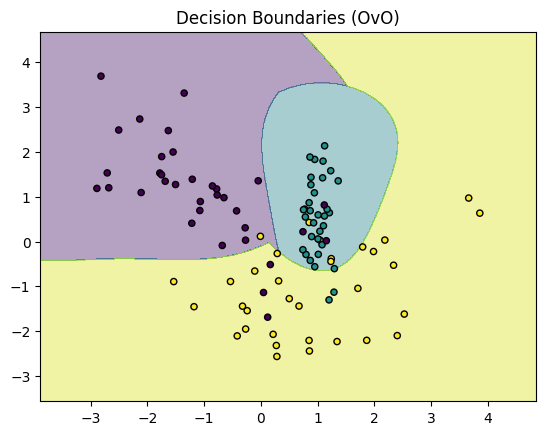

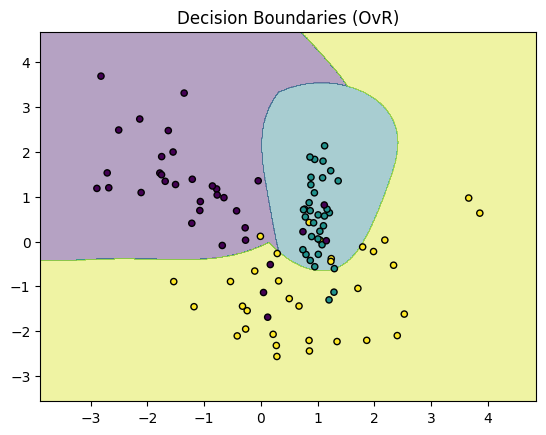

/Users/root1/Library/Python/3.11/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


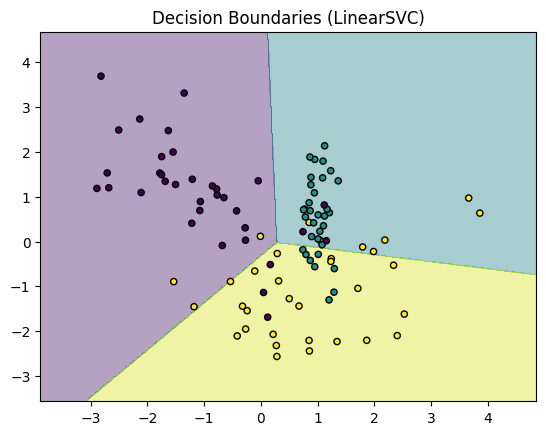

In [19]:
# 3. Visualizing Decision Boundaries (Example with 2D data)
# Create a synthetic multi-class dataset with 100 samples, 2 features, and 3 classes
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, n_classes=3, 
                           n_clusters_per_class=1, random_state=0)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #Split data into training and testing sets.


clf = svm.SVC(decision_function_shape="ovo") # one versus one 
clf.fit(X, y)

# Plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict the class for each point in the meshgrid.
Z = Z.reshape(xx.shape)  # Reshape the predictions to match the meshgrid shape.

plt.contourf(xx, yy, Z, alpha=0.4)  # Create a filled contour plot of the decision boundaries.
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')  # Plot the data points.
plt.title("Decision Boundaries (OvO)")  # Set the plot title.
plt.show()  # Display the plot.

# Do the same for ovr
clf = svm.SVC(decision_function_shape="ovr")  # Initialize an SVC classifier with OvR strategy.
clf.fit(X, y)  # Train the classifier.

# Plotting decision boundaries (same as above but for OvR)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Determine the x-axis limits for plotting.
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Determine the y-axis limits for plotting.
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),  # Create a meshgrid for plotting the decision boundaries.
                         np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict the class for each point in the meshgrid.
Z = Z.reshape(xx.shape)  # Reshape the predictions to match the meshgrid shape.

plt.contourf(xx, yy, Z, alpha=0.4)  # Create a filled contour plot of the decision boundaries.
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')  # Plot the data points.
plt.title("Decision Boundaries (OvR)")  # Set the plot title.
plt.show()  # Display the plot.

lin_clf = svm.LinearSVC()  # Initialize a LinearSVC classifier.
lin_clf.fit(X, y)  # Train the classifier.

Z = lin_clf.predict(np.c_[xx.ravel(), yy.ravel()])  # Predict the class for each point in the meshgrid.
Z = Z.reshape(xx.shape)  # Reshape the predictions to match the meshgrid shape.

plt.contourf(xx, yy, Z, alpha=0.4)  # Create a filled contour plot of the decision boundaries.
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')  # Plot the data points.
plt.title("Decision Boundaries (LinearSVC)")  # Set the plot title.

plt.show()  # Display the plot.

/Users/root1/Library/Python/3.11/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


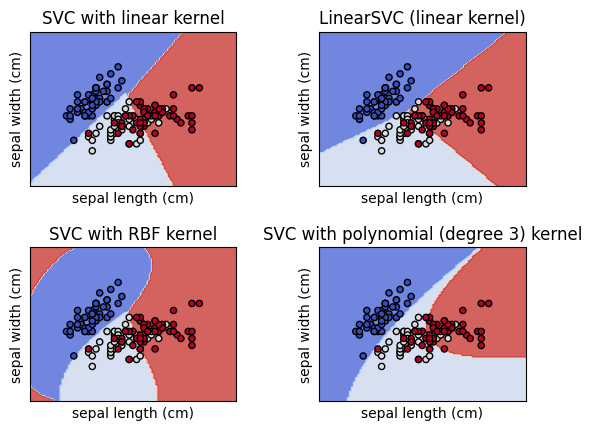

In [24]:
[1]https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py

import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

[1]https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# Instructions: Do the example. 
Remove random_state=6 from the call to make_blob. 
Rerun the example. 
# Question
Describe what is different?
# Answer: 
You'll observe a visually distinct separating line and different highlighted support vectors each time. removing random_state from make_blobs makes the dataset itself random. Each time you run the code, you're getting a completely different set of data points. The SVM algorithm, however, is still deterministic. Given a specific set of data points, the SVM will always find the same optimal hyperplane. The apparent randomness comes from the fact that the input to the SVM is changing with each run. The SVM isn't producing random hyperplanes for the same data; it's producing different hyperplanes because the data itself is different each time.

Both "gini" and "entropy" identify the third feature (index 2) as being by far the most important for classification, with an importance score of about 89% for Gini and about 88% for entropy. This suggests that this particular feature (petal length in the standard Iris dataset) plays a dominant role in distinguishing between Iris species. The choice between "gini" and "entropy" might matter more with other datasets where the impurity and information gain calculations could lead to more significant differences in tree structure and predictive accuracy.

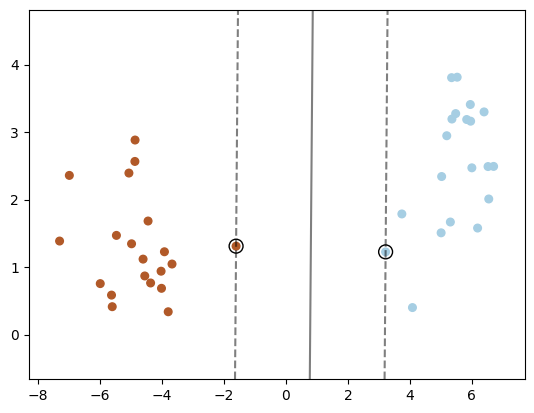

In [27]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# Create 40 separable points (without random_state)
X, y = make_blobs(n_samples=40, centers=2) # No random_state

# Fit the model (no regularization for illustration)
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision function and support vectors (same as before)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.show()

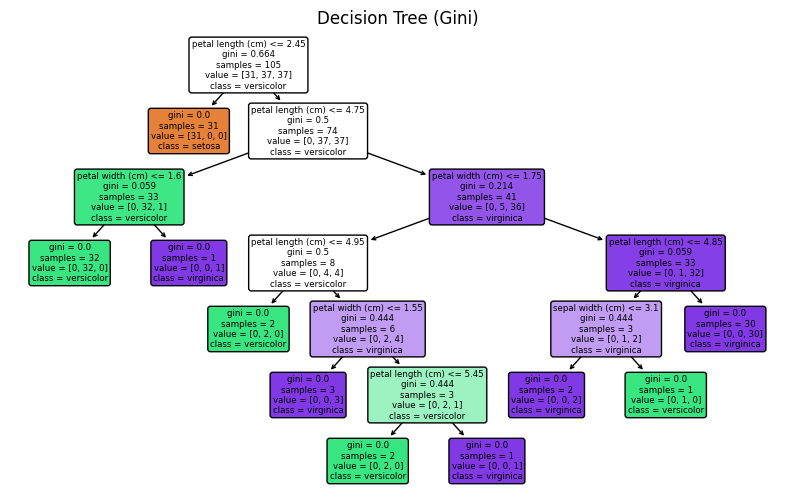

Accuracy (Gini): 1.0


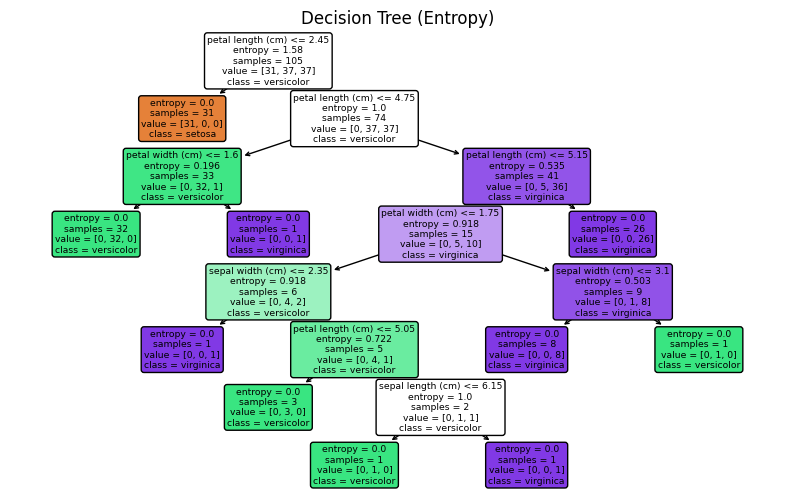

Accuracy (Entropy): 0.9777777777777777

Feature Importances:
Gini: [0.         0.01911002 0.89326355 0.08762643]
Entropy: [0.01205428 0.03875126 0.88771555 0.06147891]


In [28]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting.
from sklearn.datasets import load_iris  # Import the load_iris function to load the dataset.
from sklearn.model_selection import train_test_split  # Import train_test_split to split the data.
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import DecisionTreeClassifier and plot_tree.
from sklearn.metrics import accuracy_score # Import the function to compute the accuracy score

# Load the Iris dataset
iris = load_iris()  # Load the Iris dataset.
X, y = iris.data, iris.target  # Separate features (X) and target (y).

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Split data into 70% training and 30% testing.

# 1. Decision Tree with "gini" criterion
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)  # Initialize a DecisionTreeClassifier with the "gini" criterion.
clf_gini.fit(X_train, y_train)  # Train the classifier using the training data.

# Visualize the tree
plt.figure(figsize=(10, 6))  # Set the figure size.
plot_tree(clf_gini, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)  # Plot the decision tree.
plt.title("Decision Tree (Gini)")  # Set the plot title.
plt.show()  # Display the plot.

y_pred_gini = clf_gini.predict(X_test) # Make predictions on the testing set
accuracy_gini = accuracy_score(y_test, y_pred_gini) # Compute the accuracy score for Gini
print(f"Accuracy (Gini): {accuracy_gini}")  # Print the accuracy score.

# 2. Decision Tree with "entropy" criterion
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)  # Initialize a DecisionTreeClassifier with the "entropy" criterion.
clf_entropy.fit(X_train, y_train)  # Train the classifier using the training data.

# Visualize the tree
plt.figure(figsize=(10, 6))  # Set the figure size.
plot_tree(clf_entropy, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)  # Plot the decision tree.
plt.title("Decision Tree (Entropy)")  # Set the plot title.
plt.show()  # Display the plot.

y_pred_entropy = clf_entropy.predict(X_test) # Make predictions on the testing set
accuracy_entropy = accuracy_score(y_test, y_pred_entropy) # Compute the accuracy score for entropy criterion
print(f"Accuracy (Entropy): {accuracy_entropy}")  # Print the accuracy score.

# 3. Feature Importance Comparison
print("\nFeature Importances:")  # Print a header for feature importances.
print("Gini:", clf_gini.feature_importances_)  # Print feature importances for the "gini" classifier.
print("Entropy:", clf_entropy.feature_importances_)  # Print feature importances for the "entropy" classifier.

# Kernel Explanation:

A kernel is a function that defines how the model maps data points to a higher-dimensional space where it can perform linear separation.  Different kernels create different mappings, influencing the shape of the decision boundary. It's a crucial component of SVMs, especially with non-linearly separable data.

# Kernel Differences:
**Linear:**  Performs a linear transformation of the data. Suitable for linearly separable data. Creates a straight line decision boundary.
**RBF (Radial Basis Function):** Maps data points to an infinite-dimensional space. Very flexible and can model complex non-linear relationships. Creates curved decision boundaries. The `gamma` parameter controls the width of the RBF kernel; higher gamma means more complex boundaries and risk of overfitting.
**Polynomial:**  Maps data points to a higher-dimensional space using polynomial functions. The `degree` parameter controls the complexity of the polynomial, higher degree leads to more complex boundaries. Can capture non-linear relationships but is sensitive to feature scaling. `gamma = auto` equals to 1/ n_features

# The example code demonstrates how these different kernels create distinct decision boundaries for the Iris dataset.
The linear kernels result in straight lines, while the RBF and polynomial kernels generate curved boundaries that better capture the non-linear relationships between the first two features and the Iris species.

/Users/root1/Library/Python/3.11/lib/python/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


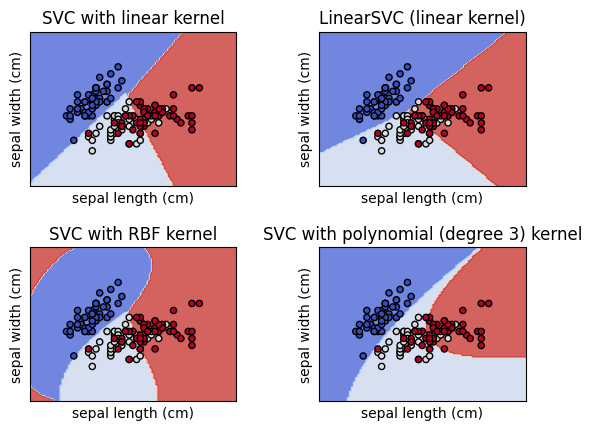

In [29]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting.
from sklearn import datasets, svm  # Import datasets and svm modules from scikit-learn.
from sklearn.inspection import DecisionBoundaryDisplay  # Import DecisionBoundaryDisplay for plotting decision boundaries.

# Import some data to play with
iris = datasets.load_iris()  # Load the Iris dataset.
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]  # Extract the first two features (sepal length and sepal width).
y = iris.target  # Target variable (species of Iris).

# We create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter (controls the trade-off between maximizing the margin and minimizing classification error).
models = (
    svm.SVC(kernel="linear", C=C),  # SVC with a linear kernel.
    svm.LinearSVC(C=C, max_iter=10000),  # LinearSVC (linear kernel, faster implementation).
    svm.SVC(kernel="rbf", gamma=0.7, C=C),  # SVC with a Radial Basis Function (RBF) kernel.
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),  # SVC with a polynomial kernel (degree 3).
)
models = (clf.fit(X, y) for clf in models)  # Train each of the models.

# Title for the plots
titles = (
    "SVC with linear kernel",  # Title for the first plot.
    "LinearSVC (linear kernel)",  # Title for the second plot.
    "SVC with RBF kernel",  # Title for the third plot.
    "SVC with polynomial (degree 3) kernel",  # Title for the fourth plot.
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)  # Create a 2x2 grid of subplots.
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots.

X0, X1 = X[:, 0], X[:, 1]  # Separate the two features for plotting.

for clf, title, ax in zip(models, titles, sub.flatten()):  # Iterate over models, titles, and subplots.
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,  # The trained classifier.
        X,  # The data.
        response_method="predict",  # Use the predict method for decision boundary.
        cmap=plt.cm.coolwarm,  # Colormap for the decision boundary.
        alpha=0.8,  # Transparency of the decision boundary fill.
        ax=ax,  # The subplot to plot on.
        xlabel=iris.feature_names[0],  # Label for the x-axis.
        ylabel=iris.feature_names[1],  # Label for the y-axis.
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")  # Scatter plot of the data points.
    ax.set_xticks(())  # Remove x-axis ticks.
    ax.set_yticks(())  # Remove y-axis ticks.
    ax.set_title(title)  # Set the title of the subplot.

plt.show()  # Display the plot.